# Plotting basics: matplotlib

In this brief lesson, we will see how to make a simple, 2D plot. We will learn about basic functions for plotting using `matplotlib`. Refer to the <a href="https://matplotlib.org/"> matplotlib website</a> for a much more complete reference of classes and methods.

First, we need the import statements:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The "magic word" `%matplotlib inline` above is needed for the plots to appear inline in this notebook. It is not necessary if the code is executed outside a jupyter notebook.

Now, we need some data to be plotted. Let us create a vector `x` and compute the graph of a function `y`, say
$$ y(x) = \frac{\sin^2(x)}{x^2} $$

In [5]:
x = np.linspace(0.,10*np.pi,10000)
y = (np.sin(x)/x)**2
print(y[0:5])

[       nan 0.99999671 0.99998684 0.99997039 0.99994735]


<ipython-input-5-6a5352b4e08c>:2: RuntimeWarning: invalid value encountered in true_divide
  y = (np.sin(x)/x)**2


Do not worry about the runtime warning (which tells us that a division by zero took place in the creation of array `y`) and about the `nan` in the `y` array: `matplotlib` will simply ignore `nan`s without complaining. We can immediately see a graphical representation of the result by using the function `plt.plot()`, as follows:

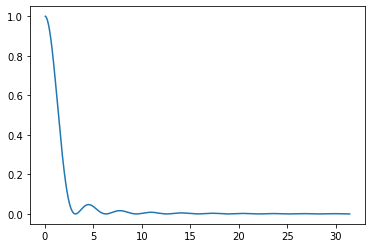

In [3]:
plt.plot(x,y)

Note that we wouldn't see the graphics if the code were executed outside a jupyter notebook unless we call the `plt.show()` function: matplotlib renders the final result of our plot only when such function is called. The `%matplotlib inline` *magic word* above simply sets things up so that `plt.show()` is called at the end of each cell, and the result is displayed inline. This has a drawback: our plot is now lost, we need to issue the plot commands again if we want it to appear below another cell.

Now, the labels in the plot are a little small. We can set the default font size by editing the `plt.rcParams` dictionary. It contains many entries which define the default behavior of `matplotlib`. The dictionary entry we want to change is `font.size`:

In [4]:
plt.rcParams['font.size']=14 # font size in points

We also want the plotted line to be thicker, and we want it red:

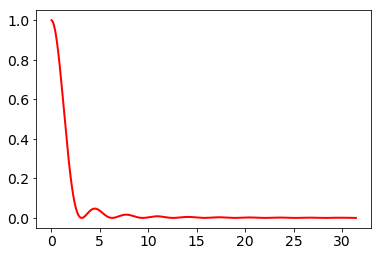

In [5]:
plt.plot(x,y,color='red',linewidth=2)

In [3]:
print(help(plt.plot))

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

The *keywords* `color` and `linewidth` have corresponding shorthands, which are called `c` and `lw`:

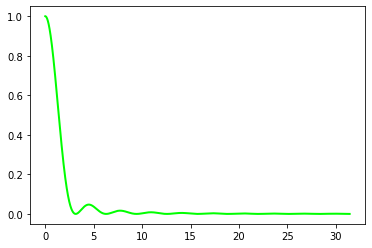

In [9]:
plt.plot(x,y,c='#00FF00',lw=2)

Now, we want to see the vertical wiggles better, so we change the y axis scaling to log-scale, using `plt.yscale`:

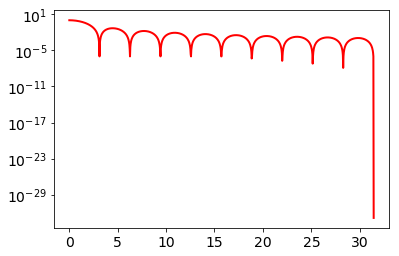

In [42]:
plt.plot(x,y,c='red',lw=2)
plt.yscale('log')

To change the plot limits, we can use `plt.xlim` and `plt.ylim`. Let's zoom the vertical axis a little bit:

(0.0001, 1.1)

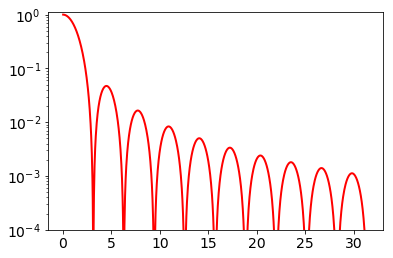

In [8]:
# imports and settings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size']=14

# compute the numbers I want to plot
x = np.linspace(0.,10*np.pi,1000)
y = (np.sin(x)/x)**2

# plot the line
plt.plot(x,y,c='red',lw=2)

# set the scales and limits
plt.yscale('log')
plt.ylim([1e-4,1.1])
#plt.yticks([1e-4,1e-3,1e-2,1e-1,1],['0.0001','0.001','0.01','0.1','1'])
plt.show()

Let's now add another line to the plot. We will overplot the envelope of the function, which is simply $z(x) = x^{-2}$, and we'll use a blue dashed line. Here is how to do it:

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in power
  """Entry point for launching an IPython kernel.


(0.0001, 1.1)

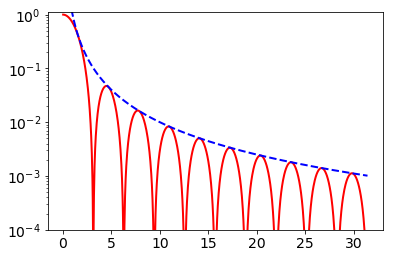

In [9]:
z = x**-2 # compute the envelope

plt.plot(x,y,c='red',lw=2)
plt.plot(x,z,c='blue',lw=2,linestyle='--') # plot the blue dashed line
plt.yscale('log')
plt.ylim([1e-4,1.1])

Also the `linestyle` keyword has a shorthand, which is `ls`. We want now to create a legend to show the meaning of the lines. We must add a label to each line, using the `label` keyword in the plot command, and then create the legend using `plt.legend`, as follows:

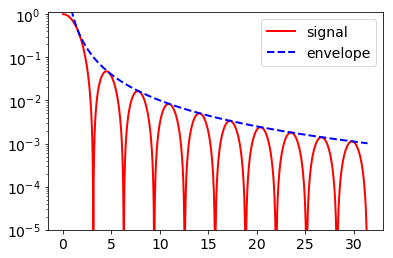

In [56]:
plt.plot(x,y,c='red',lw=2,label='signal')
plt.plot(x,z,c='blue',lw=2,ls='--',label='envelope')
plt.yscale('log')
plt.ylim([1e-4,1.1])
plt.legend()

We then add axis labels using `plt.xlabel` and `plt.ylabel`. The labels can be written in $\LaTeX$ notation, provided that an `r` is prepended to the corresponding strings (to avoid the backslashes to be interpreted as escape characters) and that the $\LaTeX$ commands are enclosed within dollar (`$`) signs:

Text(0,0.5,'$f(\\omega)/f_\\mathrm{max}$')

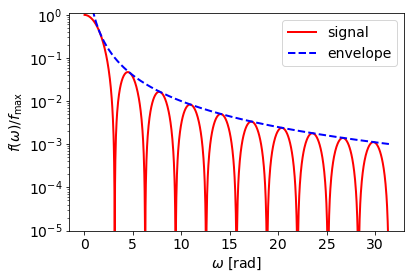

In [57]:
plt.plot(x,y,c='red',lw=2,label='signal')
plt.plot(x,z,c='blue',lw=2,ls='--',label='envelope')
plt.yscale('log')
plt.ylim([1e-5,1.1])
plt.legend()
plt.xlabel(r'$\omega$ [rad]')
plt.ylabel(r'$f(\omega)/f_\mathrm{max}$')

To make both axes log-scale, one can use the shorthand `plt.loglog()`. This function can also be used in place of `plt.plot`, it has exactly the same notation, but it also sets both axes log-scale after creating the lines. We can also move the legend to a better location using the keyword `loc`:

Text(0,0.5,'$f(\\omega)/f_\\mathrm{max}$')

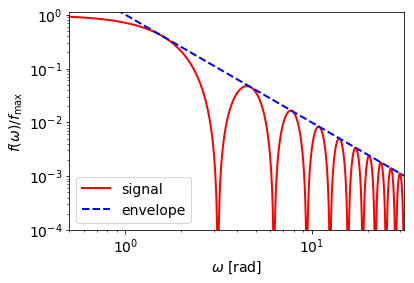

In [10]:
plt.plot(x,y,c='red',lw=2,label='signal')
plt.plot(x,z,c='blue',lw=2,ls='--',label='envelope')
#plt.yscale('log')
#plt.xscale('log')
plt.loglog()
plt.ylim([1e-4,1.1])
plt.xlim([5e-1,10*np.pi])
plt.legend(loc='lower left')
plt.xlabel(r'$\omega$ [rad]')
plt.ylabel(r'$f(\omega)/f_\mathrm{max}$')

To insert an annotation (a text label at an arbitrary position in the plot), we can use the function `plt.annotate()`. We must specify the location in data coordinates using the keyword `xy`, the text as a string using the keyword `s`, and optionally the text rotation in degrees using the keyword `rotation`, as done below:

Text(10,0.01,'$\\propto\\omega^{-2}$')

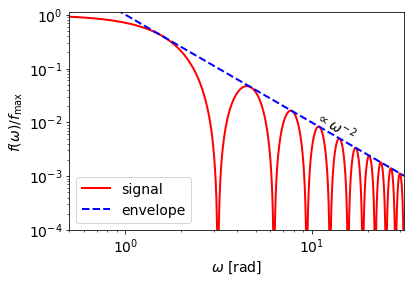

In [11]:
plt.plot(x,y,c='red',lw=2,label='signal')
plt.plot(x,z,c='blue',lw=2,ls='--',label='envelope')
#plt.yscale('log')
#plt.xscale('log')
plt.loglog()
plt.ylim([1e-4,1.1])
plt.xlim([5e-1,10*np.pi])
plt.legend(loc='lower left')
plt.xlabel(r'$\omega$ [rad]')
plt.ylabel(r'$f(\omega)/f_\mathrm{max}$')
plt.annotate(r'$\propto\omega^{-2}$',xy=(10.,1e-2),rotation=-30,\
             fontsize=14)

The `plt.fill_between` function can be used to fill a region comprised between two curves. The two curves must be defined by two arrays y, z that refer to the same x coordinate array. The notation is quite similar to that of the `plt.plot` function. Since the result is now effectively a filled polygon, one can specify both the fill color (keyword `facecolor`) and the edge color (keyword `edgecolor`).

Text(10,0.01,'$\\propto\\omega^{-2}$')

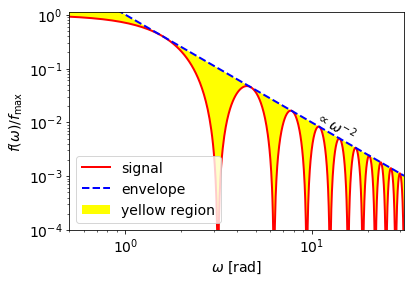

In [12]:
plt.plot(x,y,c='red',lw=2,label='signal')
plt.plot(x,z,c='blue',lw=2,ls='--',label='envelope')
plt.fill_between(x,y,z,facecolor='yellow',edgecolor='None',\
                 label='yellow region')
#plt.yscale('log')
#plt.xscale('log')
plt.loglog()
plt.ylim([1e-4,1.1])
plt.xlim([5e-1,10*np.pi])
plt.legend(loc='lower left')
plt.xlabel(r'$\omega$ [rad]')
plt.ylabel(r'$f(\omega)/f_\mathrm{max}$')
plt.annotate(xy=(10.,1e-2),s=r'$\propto\omega^{-2}$',rotation=-30,fontsize=14)

Finally, let's remove the legend frame by setting the `frameon` kewyord to `False`:

Text(10,0.01,'$\\propto\\omega^{-2}$')

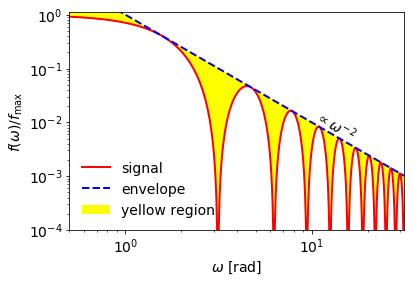

In [13]:
plt.plot(x,y,c='red',lw=2,label='signal')
plt.plot(x,z,c='blue',lw=2,ls='--',label='envelope')
plt.fill_between(x,y,z,facecolor='yellow',edgecolor='None',label='yellow region')
#plt.yscale('log')
#plt.xscale('log')
plt.loglog()
plt.ylim([1e-4,1.1])
plt.xlim([5e-1,10*np.pi])
plt.legend(loc='lower left',frameon=False)
plt.xlabel(r'$\omega$ [rad]')
plt.ylabel(r'$f(\omega)/f_\mathrm{max}$')
plt.annotate(xy=(10.,1e-2),s=r'$\propto\omega^{-2}$',rotation=-30,fontsize=14)

We can now tidy everything up, to have all the commands contained in a single cell (which is then the complete code of a script that produces the plot), and let's add a command at the end to save the figure: `plt.savefig()`, with the filename as the only argument, will save the plot in the format specified by the file extension. Let's save the result in `pdf` format, that is scalable (vectorial) and can be included in PdfLaTeX documents right away:

<ipython-input-3-15f78f12743e>:12: RuntimeWarning: invalid value encountered in true_divide
  y = (np.sin(x)/x)**2 # the Fourier transform of a certain signal
<ipython-input-3-15f78f12743e>:13: RuntimeWarning: divide by zero encountered in power
  z = x**-2 # the envelope of the above signal in frequency space
<ipython-input-3-15f78f12743e>:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=(10.,1e-2),s=r'$\propto\omega^{-2}$',rotation=-30,fontsize=14)


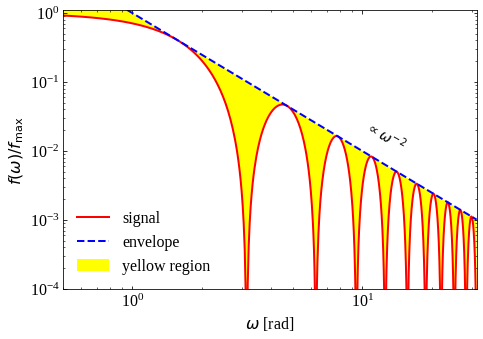

In [3]:
# import the libraries, and tweak the settings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(7,5) # inches
plt.rcParams['font.size']=16 # points
plt.rcParams['font.family']='Liberation Serif' # the name of an installed font
plt.rcParams['figure.autolayout']=True # to avoid the labels to fall off the figure

# first, create the data we want to plot
x = np.linspace(0.,10*np.pi,1000) # an array of angular frequencies
y = (np.sin(x)/x)**2 # the Fourier transform of a certain signal
z = x**-2 # the envelope of the above signal in frequency space

# plot the signal, the envelope, and the yellow region
plt.plot(x,y,c='red',lw=2,label='signal')
plt.plot(x,z,c='blue',lw=2,ls='--',label='envelope')
plt.fill_between(x,y,z,facecolor='yellow',label='yellow region')

# annotate the envelope, showing its power-law dependence
plt.annotate(xy=(10.,1e-2),s=r'$\propto\omega^{-2}$',rotation=-30,fontsize=14)

# set the axes scales log-log, and tweak the axes limits
plt.loglog()
plt.ylim([1e-4,1.1])
plt.xlim([5e-1,10*np.pi])

# label the axes
plt.xlabel(r'$\omega$ [rad]')
plt.ylabel(r'$f(\omega)/f_\mathrm{max}$')

# make better-looking tick marks
plt.tick_params(which='both',direction='in',top=True,right=True)

# make the legend
plt.legend(loc='lower left',frameon=False)

# save the figure
plt.savefig('my_figure.pdf')

## Exercise 6

Produce a plot of a gaussian distribution with $\mu = 3$ and $\sigma = 0.25$. Find the point $x$ at which the integral starting from $-\infty$ is equal to 0.7 and shade the corresponding area. You may find these functions useful: `trapz` in `numpy`, `erf` in `scipy.special` and `cumtrapz` in `scipy.integrate`.
Below is a demonstration of the `scipy.integrate.cumtrapz` and `scipy.special.erf` functions that can be useful.

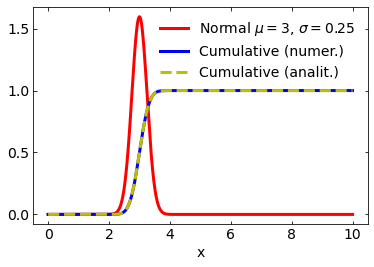

In [28]:
from scipy.integrate import cumtrapz
from scipy.special import erf

plt.rcParams['font.size']=14

mu = 3.
sigma = 0.25
x = np.linspace(0.,10.,10000)
y = np.exp(-0.5*((x-mu)/sigma)**2)/np.sqrt(2*np.pi*sigma**2)
Y = cumtrapz(y,x,initial=0.)
Y_analytical = 0.5*(1.+erf((x-mu)/(sigma*2**0.5)))

plt.plot(x,y,lw=3,c='r',label=r'Normal $\mu=3$, $\sigma=0.25$')
plt.plot(x,Y,lw=3,c='b',label=r'Cumulative (numer.)')
plt.plot(x,Y_analytical,ls='--',lw=3,c='y',label=r'Cumulative (analit.)')

plt.tick_params(which='both',direction='in',top=True,right=True)
plt.xlabel('x')

plt.legend(frameon=False)

## Matplotlib classes

A more detailed control on the appearance of matplotlib objects can be achieved by accessing the methods inside its classes. First of all, figures are classes, and can be instantiated by the `plt.figure` method:

In [11]:
fig = plt.figure(figsize=(5,4))

<Figure size 360x288 with 0 Axes>

Each figure can contain a number of `axes`, which is where `matplotlib` places its plots. Axes can be created by `plt.axes([l,b,w,h])`, where `[l,b,w,h]` is a list containing the left side position, bottom side position, width and height of the axes, all as fractions of the figure size:

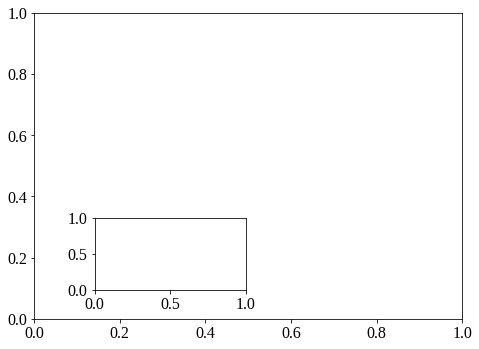

In [17]:
ax1 = plt.axes([0.1,0.1,0.85,0.85])
ax2 = plt.axes([0.22,0.18,0.3,0.2])

The axes class contains many methods, such as `ax1.plot`, which can be used to put plots and other fancy matplotlib outputs within the given axes instance.

(0.5, 0.7)

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


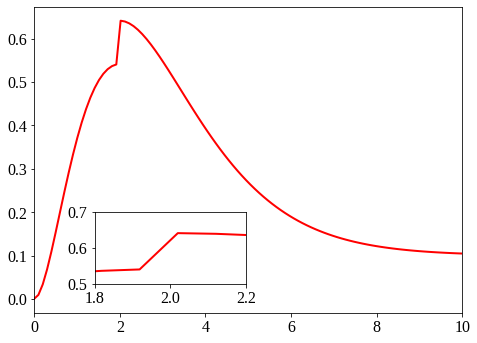

In [18]:
ax1 = plt.axes([0.1,0.1,0.85,0.85])
ax2 = plt.axes([0.22,0.18,0.3,0.2])

x = np.linspace(0.,10.,100)
y = x**2*np.exp(-x) + 0.1*np.heaviside(x-2,0.5)

ax1.plot(x,y,'-r',lw=2)
ax1.set_xlim(0.,10.)

ax2.plot(x,y,'-r',lw=2)
ax2.set_xlim(1.8,2.2)
ax2.set_ylim(0.5,0.7)

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


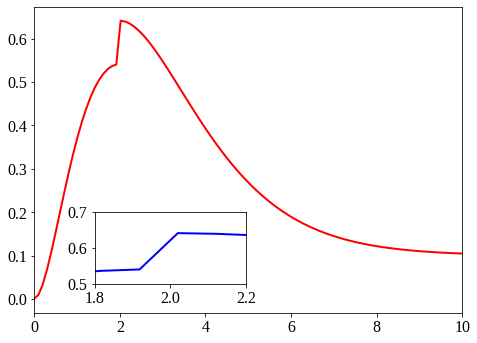

In [26]:
ax1 = plt.axes([0.1,0.1,0.85,0.85])
ax2 = plt.axes([0.22,0.18,0.3,0.2])

x = np.linspace(0.,10.,100)
y = x**2*np.exp(-x) + 0.1*np.heaviside(x-2,0.5)

l1 = ax1.plot(x,y,'-r',lw=2)
ax1.set_xlim(0.,10.)

l2 = ax2.plot(x,y,'-r',lw=2)
ax2.set_xlim(1.8,2.2)
ax2.set_ylim(0.5,0.7)

l2[0].set_color('blue') # l2 is a list of matplotlib artists 
#     (it actually contains only one artist, called Line2D)